In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import seaborn as sns
from matplotlib import pyplot

In [38]:
crime=pd.read_csv('crime_data.csv',index_col=0)

In [37]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


In [39]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [42]:
crime

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [43]:
crime.shape

(50, 4)

In [7]:
scaler=StandardScaler()
crime_scaled=scaler.fit_transform(crime.iloc[:,1:])

In [8]:
crime_scaled

array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393],
       [ 0.40290872,  0.86954794,  1.88390137],
       [-0.73648418,  0.79976079, -1.09272319],
       [ 0.81502956,  0.45082502, -0.58583422],
       [ 1.99078607,  1.00912225,  1.1505301 ],
       [ 0.48775713, -0.38662083,  0.49265293],
       [-1.51224105,  1.21848371, -0.11129987],
       [-0.61527217, -0.80534376, -0.75839217],
       [ 0.94836277,  1.21848371,  0.29852525],
       [-0.70012057, -0.03768506, -0.0250209 ],
       [-1.39102904, -0.5959823 , -1.07115345],
       [-0.67587817,  0.03210209, -0.34856705],
       [-0.74860538, -0.94491807, -0.53190987],
       [ 0.94836277,  0.03210209,  0.10439756],
       [-1.06375661, -1.01470522, -1.44862395],
       [ 1.56654403,  0.10188925,  0.70835037],
       [-0.26375734,  1.35805802, -0.531

In [13]:
dbscan=DBSCAN(eps=2, min_samples=5)

In [14]:
dbscan.fit(crime_scaled)

DBSCAN(eps=2)

In [15]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [16]:
cl=pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [17]:
cl  # noisy sample gives the label=-1

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [47]:
crime['clusterid']=dbscan.labels_

In [48]:
crime

,Murder,Assault,UrbanPop,Rape,clusterid
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,0


In [49]:
crime.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.000000,263.000000,48.000000,44.500000
1,0,7.742857,168.877551,65.897959,20.757143


In [79]:
# Q2
#Airlines

Airline=pd.read_excel('data.xlsx')

In [78]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  clusterid          3999 non-null   int64
dtypes: int64(13)
memory usage: 406.3 KB


In [80]:
Airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [84]:
Airline=Airline.drop(['ID#'],axis=1)

In [85]:
Airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [86]:
#standarizing the value
scaler=StandardScaler()
Airline_scaled=scaler.fit_transform(Airline.iloc[:,0:])

In [87]:
Airline_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [99]:
dbscan=DBSCAN(eps=10, min_samples=10)
dbscan.fit(Airline_scaled)

DBSCAN(eps=10, min_samples=10)

In [100]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
Airline['clusterid']=dbscan.labels_

In [102]:
Airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [103]:
Airline.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,160114.000000,500.000000,1.00000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.00000,1373.000000,1.000000
1,0,73579.688594,144.025513,2.05978,1.014507,1.012256,17131.137069,11.583292,452.462731,1.36068,4119.246123,0.370185


<AxesSubplot:xlabel='clusterid', ylabel='Award?'>

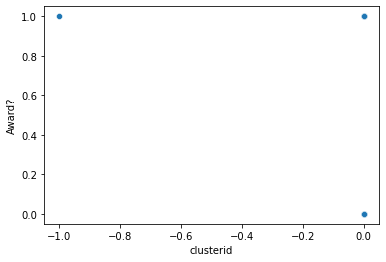

In [114]:
sns.scatterplot(x='clusterid',y='Award?',data=Airline) # only 1 value is labbeled as outliers for award

<AxesSubplot:xlabel='clusterid', ylabel='Bonus_trans'>

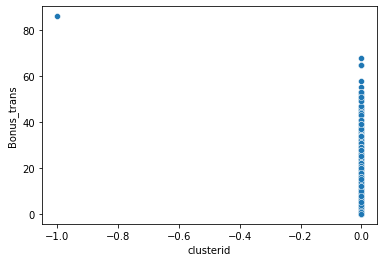

In [115]:
sns.scatterplot(x='clusterid',y='Bonus_trans',data=Airline) # only one value is found as outlier in bonus_trans

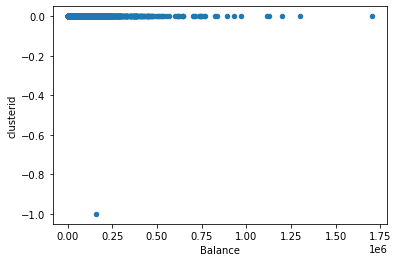

In [122]:
Airline.plot(x='Balance',y='clusterid',kind='scatter')
pyplot.show()

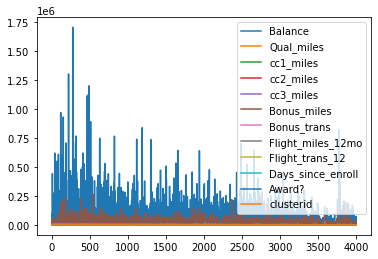

In [123]:
Airline.plot()
pyplot.show()